# Problems

## Problem 1: Data from yfinance

The first thing that is necessary is to import the packages we need. In this case, we'll start with yfinance and pandas as well as datetime.

In [10]:
# This imports the Os module
import os

# This imports datetime
from datetime import datetime

# This imports Pandas
import pandas as pd

# This imports Matplotlib
import matplotlib.pyplot as plt

# This imports yfinance
import yfinance as yf

Afterwards, since this is an unnoficial package, let's test it out to make sure it's working. If we follow allong with the main documentation, we can see that yf.download will get us the data. If everything is working, we should have no issues getting the data. 

In [11]:
# As per the documentation, we create first the variable called tickers and use yf.Tickers.
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# With that variable set up, we can go ahead and just print data for 1 month. 
current_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='1mo')
print(current_data)

# References:
# https://ranaroussi.github.io/yfinance/

/tmp/ipykernel_4011/2821640980.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  current_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='1mo')
[*********************100%***********************]  5 of 5 completed

Price            Close                                                  \
Ticker            AAPL        AMZN        GOOG        META        NFLX   
Date                                                                     
2025-11-03  268.789429  254.000000  284.119995  637.710022  110.009003   
2025-11-04  269.778473  249.320007  278.059998  627.320007  109.295998   
2025-11-05  269.878387  250.199997  284.750000  635.950012  109.846001   
2025-11-06  269.508728  243.039993  285.339996  618.940002  109.702003   
2025-11-07  268.209991  244.410004  279.700012  621.710022  110.365997   
2025-11-10  269.429993  248.399994  290.589996  631.760010  112.007004   
2025-11-11  275.250000  249.100006  291.739990  627.080017  113.643997   
2025-11-12  273.470001  244.199997  287.429993  609.010010  115.750000   
2025-11-13  272.950012  237.580002  279.119995  609.890015  115.422997   
2025-11-14  272.410004  234.690002  276.980011  609.460022  111.217003   
2025-11-17  267.459991  232.869995  28

With everything properly tested, the next step is writing the function itself on these same companies.

In [12]:
def get_data():
    
    # By following the documentation and the format that we defined above, we can do the same thing here. 
    # The only problem I had was the hourly interval.
    # Luckily, I was able to find some information on this and the only thing that's needed is setting up a variable called "interval" 
    # with the desired interval.
    df = yf.download(
        ["META", "AAPL", "AMZN", "NFLX", "GOOG"],
        period="5d",
        interval="1h"
    )

    # We then use the datetime package to help us with the formatting. 
    # In this case, we can use strftime, which returns a string representing date and time using date, time or datetime object. 
    # In other words, we can use the datetime function and apply that 
    # format to look the way we want.
    time_format = datetime.now().strftime("%Y%m%d-%H%M%S")

    # We create a variable called data that contains the full path and name of the file we need to save. This snippet came from ChatGpt:
    data = f"data/{time_format}.csv"

    # Finally, we send it to the folder with the to_csv function.
    df.to_csv(data)

    return df

# If it all works out, we can run this and it will create our csv file. 

yfinance_data = get_data()

yfinance_data


# References
# https://algotrading101.com/learn/yfinance-guide/ - On Yfinance in general
# https://www.programiz.com/python-programming/datetime/strftime - On using the datetime package
# https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html - On the Yfinance.download parameters
# https://www.geeksforgeeks.org/pandas/saving-a-pandas-dataframe-as-a-csv/ - On saving a pandas df as a csv
# ChatGpt - For the solution on data = f"data/{time_format}.csv":
'''
    ✅ Explanation
    - f"data/{timestamp}.csv" points directly to your folder.
    - df.to_csv(filepath) writes the file—no imports or folder checks needed since the folder exists.

    It’s short, clean, and will drop your file neatly into the data/ folder every time you run it.

    Me - "I dont understand this specifically: filename = f"data/{time_format}.csv" Is this needed? 
    Since I already have df.to_csv(filename), why do I need that?"

    You need:
    filename = f"data/{time_format}.csv" because df.to_csv() needs to know where to save the file.
    That line creates the file path as a string (e.g. "data/20251013-214200.csv") — which you then pass into df.to_csv().
'''

/tmp/ipykernel_4011/3510958835.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  5 of 5 completed


'\n    ✅ Explanation\n    - f"data/{timestamp}.csv" points directly to your folder.\n    - df.to_csv(filepath) writes the file—no imports or folder checks needed since the folder exists.\n\n    It’s short, clean, and will drop your file neatly into the data/ folder every time you run it.\n\n    Me - "I dont understand this specifically: filename = f"data/{time_format}.csv" Is this needed? \n    Since I already have df.to_csv(filename), why do I need that?"\n\n    You need:\n    filename = f"data/{time_format}.csv" because df.to_csv() needs to know where to save the file.\n    That line creates the file path as a string (e.g. "data/20251013-214200.csv") — which you then pass into df.to_csv().\n'

In [13]:
# Small test to see what the close column is
csv_path = "data/20251103-194125.csv"  
df = pd.read_csv(csv_path, header=[0, 1], skiprows=[2], index_col=0, parse_dates=True)  
df.head(5)

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
2025-10-28 13:30:00+00:00  268.649994  226.520004  268.019989  747.349976   
2025-10-28 14:30:00+00:00  268.697205  227.550003  268.000000  754.349976   
2025-10-28 15:30:00+00:00  268.994995  229.110001  267.739990  751.965027   
2025-10-28 16:30:00+00:00  269.494995  230.690002  268.772705  756.109985   
2025-10-28 17:30:00+00:00  269.090210  230.052399  268.831787  754.802979   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
2025-10-28 13:30:00+00:00  1109.030151  269.869995  228.589996  271.380005   
2025-10-28 14:30:00+00:00  1103.260010  269.140015  227.880005  268.467194   
2025-10-28 15:30:00+00:00  1101.296143  269.075806  229.229996  268.160004   
2025-10-28 16:30:00+00:00  1103.755127  269.869995  230.789993  268.910492   
2025-10-28 17:30:00+00:00  1109.500000  269.494995  231.485001  269.059998   

Price                                               ...        Open  \
Ticker                           META         NFLX  ...        AAPL   
2025-10-28 13:30:00+00:00  758.390015  1116.979858  ...  269.135010   
2025-10-28 14:30:00+00:00  754.700012  1109.195801  ...  268.642303   
2025-10-28 15:30:00+00:00  754.700012  1103.280029  ...  268.695007   
2025-10-28 16:30:00+00:00  756.210022  1105.619995  ...  268.980011   
2025-10-28 17:30:00+00:00  756.650024  1110.790039  ...  269.494995   

Price                                                                       \
Ticker                           AMZN        GOOG        META         NFLX   
2025-10-28 13:30:00+00:00  228.220001  269.989990  752.989990  1094.020020   
2025-10-28 14:30:00+00:00  226.529999  268.019989  747.340027  1109.030151   
2025-10-28 15:30:00+00:00  227.539993  267.990509  754.375000  1103.280029   
2025-10-28 16:30:00+00:00  229.110001  267.750000  752.070007  1101.290039   
2025-10-28 17:30:00+00:00  230.690002  268.752899  756.054993  1103.699951   

Price                        Volume                                       
Ticker                         AAPL      AMZN     GOOG     META     NFLX  
2025-10-28 13:30:00+00:00  11832766  10054295  5376066  3103414  1299551  
2025-10-28 14:30:00+00:00   3550384   4415312  2329834  1786041   427178  
2025-10-28 15:30:00+00:00   2758052   6774729  1805470  1290682   318734  
2025-10-28 16:30:00+00:00   3503864   6313749  2182660  1305274   368228  
2025-10-28 17:30:00+00:00   3181670   6155117  1509673   829164   391136  

[5 rows x 25 columns]

We also need to make sure that that data is properly sorted and organised, so that we can always get the latest one.

In [14]:
# We assing to a variable the os function that searches through the data folder
data_files = os.listdir('data/')

# We sort them to get the latest one.
data_files.sort(reverse=True)

# We get the latest file.
data_files

['20251203-183702.csv',
 '20251203-183632.csv',
 '20251126-152750.csv',
 '20251126-152628.csv',
 '20251126-144029.csv',
 '20251126-135913.csv',
 '20251126-135649.csv',
 '20251117-194254.csv',
 '20251111-163125.csv',
 '20251110-184848.csv',
 '20251103-195234.csv',
 '20251103-194125.csv',
 '20251103-193131.csv',
 '20251103-190737.csv']

In [15]:
# We also make sure that we assign the latest csv file to a proper dataframe.
df = pd.read_csv(f'data/{data_files[0]}', header=[0, 1], skiprows=[2], index_col=0, parse_dates=True)
df

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
2025-11-26 14:30:00+00:00  277.809998  230.514999  318.279999  635.400024   
2025-11-26 15:30:00+00:00  279.010101  231.084106  319.635010  637.190002   
2025-11-26 16:30:00+00:00  279.079010  230.880005  319.089996  636.739990   
2025-11-26 17:30:00+00:00  278.549988  230.710007  319.630005  635.599976   
2025-11-26 18:30:00+00:00  278.260010  229.565002  319.149994  633.900024   
2025-11-26 19:30:00+00:00  278.079987  229.429993  319.652008  634.205017   
2025-11-26 20:30:00+00:00  277.470001  229.119995  320.279999  633.549988   
2025-11-28 14:30:00+00:00  276.260010  231.479996  318.079987  641.385010   
2025-11-28 15:30:00+00:00  276.250000  231.940002  317.470001  644.494995   
2025-11-28 16:30:00+00:00  277.049988  232.104507  319.720001  645.299988   
2025-12-01 14:30:00+00:00  278.142090  232.880005  317.010010  639.494995   
2025-12-01 15:30:00+00:00  277.920013  233.970001  316.815002  642.734985   
2025-12-01 16:30:00+00:00  279.770508  234.365005  317.825012  643.510010   
2025-12-01 17:30:00+00:00  280.588196  234.960098  317.281708  641.674988   
2025-12-01 18:30:00+00:00  280.890015  234.179993  316.230011  642.338013   
2025-12-01 19:30:00+00:00  281.910004  234.478195  316.719910  641.234985   
2025-12-01 20:30:00+00:00  283.320007  233.949997  315.230011  640.909973   
2025-12-02 14:30:00+00:00  284.570007  234.720001  316.576996  642.252502   
2025-12-02 15:30:00+00:00  285.540009  234.390106  314.860107  639.468994   
2025-12-02 16:30:00+00:00  285.869995  236.190002  315.989990  644.830017   
2025-12-02 17:30:00+00:00  285.214996  235.160004  316.500000  645.890015   
2025-12-02 18:30:00+00:00  285.625000  234.982101  316.884308  646.239990   
2025-12-02 19:30:00+00:00  286.239990  235.500000  316.000000  647.005005   
2025-12-02 20:30:00+00:00  286.230011  234.369995  316.070007  647.090027   
2025-12-03 14:30:00+00:00  287.340515  231.399994  317.915009  643.404175   
2025-12-03 15:30:00+00:00  286.410004  232.180695  319.535004  642.580017   
2025-12-03 16:30:00+00:00  286.385010  232.470001  320.679993  645.823303   
2025-12-03 17:30:00+00:00  285.679291  231.960007  321.505005  644.700012   
2025-12-03 18:30:00+00:00  285.820007  231.879395  321.750000  644.312378   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
2025-11-26 14:30:00+00:00  106.089996  279.047485  230.809998  324.984985   
2025-11-26 15:30:00+00:00  106.300003  279.140015  231.309998  320.458313   
2025-11-26 16:30:00+00:00  106.610001  279.529999  231.747406  320.205994   
2025-11-26 17:30:00+00:00  106.455002  279.290009  230.990005  319.790009   
2025-11-26 18:30:00+00:00  106.210098  278.581787  230.744995  319.670013   
2025-11-26 19:30:00+00:00  105.864998  278.940002  229.789993  319.785004   
2025-11-26 20:30:00+00:00  106.120003  278.299988  229.809998  320.799988   
2025-11-28 14:30:00+00:00  107.440002  278.239197  232.210007  326.880005   
2025-11-28 15:30:00+00:00  107.440002  276.919891  232.544998  319.496704   
2025-11-28 16:30:00+00:00  107.525002  277.160095  232.880005  320.105011   
2025-12-01 14:30:00+00:00  107.910004  278.769989  235.796997  319.630005   
2025-12-01 15:30:00+00:00  108.380096  278.480103  234.361404  318.630005   
2025-12-01 16:30:00+00:00  108.559998  279.890015  234.470001  318.329987   
2025-12-01 17:30:00+00:00  108.906601  280.640015  235.229996  318.477997   
2025-12-01 18:30:00+00:00  108.610001  281.220001  235.490005  317.989990   
2025-12-01 19:30:00+00:00  109.059998  281.940002  234.559998  316.834686   
2025-12-01 20:30:00+00:00  109.190002  283.410004  234.550003  316.750000   
2025-12-02 14:30:00+00:00  108.165001  285.308990  235.770004  318.600006   
2025-12-02 15:30:00+00:00  107.925003  287.399994  238.970001  318.48001

## Problem 2: Plotting Data

With the data properly saved, we're going to create a function that plots our data.

In [16]:
# The first thing is getting the data we need. In this case, as per the assignment, we need to plot the closing prices of our chosen stocks
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'META'),
            ( 'Close', 'NFLX'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'META'),
            (  'High', 'NFLX'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'META'),
            (   'Low', 'NFLX'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'META'),
            (  'Open', 'NFLX'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'META'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [17]:
# Afterwards, we go into the actual ploting.

def plot_data():

# Create new figure and axis.
    fig, ax = plt.subplots()

# Plot all closing prices.
    df['Close'].plot(ax=ax)

# Give our labels and titles. 
# We need to force the legend to go to the upper right, since it was in the middle of the plot.
    ax.legend(loc='upper right')

    ax.set_title("Close Price – Last 5 Days")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

# # Format timestamp for filename.
    now = datetime.now()
    time_format = now.strftime("%Y%m%d-%H%M%S")

# Build file path inside existing 'plots' folder.
    filepath = f"plots/{time_format}.png"

# # Save it with our desired resolution.
    fig.savefig(filepath, dpi=300)

# References:
# For ideas on plotting stocks:
# https://www.investopedia.com/articles/technical/112601.asp
# https://www.investopedia.com/terms/p/pennant.asp

# On making charts and plots:
# https://pandas.pydata.org/docs/user_guide/visualization.html  
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html

With the function created, we can just go ahead and call it.

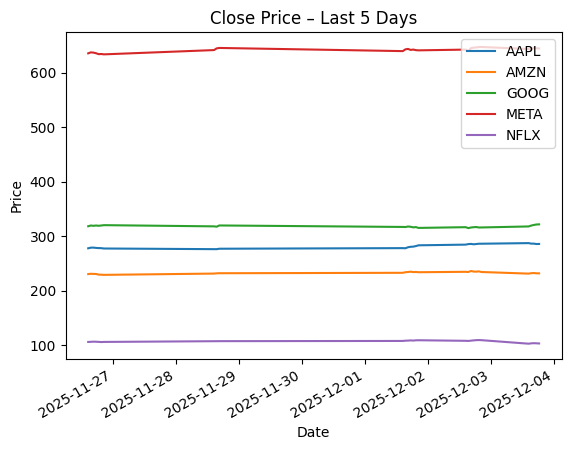

In [18]:
yfinance_plot = plot_data()

yfinance_plot

## Problem 3: Script


For the following problem, I went ahead and copied the functions themselves (both from downloading data and making plots) and pasted them into a python file called faang.py.
These were copied as actual scripts instead of functions however, since we'll just run the file as is.
>
Afterwards, I made sure I was able to excute the the script from the terminal command line through the following steps:
>
1. I created a new terminal in the current actice workspace.
2. Once the terminal was created, I made sure I was located in my root repository by using the __ls -l__ command and paying attention to the directory __(/workspaces/Computer_Infrastructure (main))__
3. After this, I checked if the python script was executable or not. It seems it only had read and write permissions as evidenced by the following: __-rw-rw-rw-__
4. I then used the command __chmod u+x faang.py__ to make sure that the file was executable
6. Finally, I made sure that the script contained a shebang line __(#! /usr/bin/env python)__ so the program knows which interpreter should run the file when its executed.
5. I ran the file via the __./faang.py__ command to check if it was running fine.

## Problem 4: Automation
